* **Write the normalization code separately where we feed the filtered and raw image state into the model**

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

import os
import math
import torch.nn.functional as F

PATH= Path("")

kernel = np.array([-1,1])

def conv(img, kernel):
    
    out = np.zeros(img.shape)
    img = np.pad(img,[(0, 0), (0, 1)],"edge") # This will do the padding for not to reduce size
    
    for i in range(img.shape[0]):
    
        for j in range(img.shape[1]-1):
            out[i][j] = abs((img[i][j:j+2] * kernel).sum())
    
    return out


def _get_files(p, fs, extensions = None):
    p = Path(p) # to support / notation
    res = [p/f for f in fs if not f.startswith(".") 
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res


def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            img = np.array(Image.open(e))
            l = [np.concatenate((conv(img, kernel).reshape(-1), img.reshape(-1)))]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

trn_x, trn_y = create_ds_from_file(PATH/"train")
val_x,val_y = create_ds_from_file(PATH/"validation")

train/0
train/1
train/2
train/3
train/4
train/5
train/6
train/7
train/8
train/9
validation/0
validation/1
validation/2
validation/3
validation/4
validation/5
validation/6
validation/7
validation/8
validation/9


In [2]:
# From 0 to 784 pixels, I calculated the standard deviation of the first images and assign them to the first images.

mean = trn_x[:,0:784].mean()
std = trn_x[:,0:784].std()

trn_x[:,0:784]=(trn_x[:,0:784]-mean)/std
mean, std, trn_x[:,0:784].mean(), trn_x[:,0:784].std()

(tensor(18.2785), tensor(44.2487), tensor(-3.8307e-07), tensor(1.))

In [3]:
# From 784 to 1568 pixels, I calculated the standard deviation of the second images and assign them to the second images.

mean = trn_x[:,784:1568].mean()
std = trn_x[:,784:1568].std()

trn_x[:,784:1568]=(trn_x[:,784:1568]-mean)/std
mean, std, trn_x[:,784:1568].mean(), trn_x[:,784:1568].std()

(tensor(34.3409), tensor(77.5014), tensor(8.3876e-08), tensor(1.))

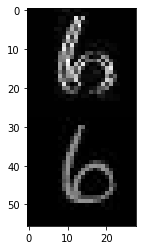

In [4]:
plt.imshow(trn_x[20000].view(56,28), cmap = "gray");

In [5]:
# From 0 to 784 pixels, I calculated the standard deviation of the first images and assign them to the first images.

mean = val_x[:,0:784].mean()
std = val_x[:,0:784].std()

val_x[:,0:784]=(val_x[:,0:784]-mean)/std
mean, std, val_x[:,0:784].mean(), val_x[:,0:784].std()

(tensor(18.4118), tensor(44.3455), tensor(-2.3563e-07), tensor(1.))

In [6]:
# From 784 to 1568 pixels, I calculated the standard deviation of the second images and assign them to the second images.

mean = val_x[:,784:1568].mean()
std = val_x[:,784:1568].std()

val_x[:,784:1568]=(val_x[:,784:1568]-mean)/std
mean, std, val_x[:,784:1568].mean(), val_x[:,784:1568].std()

(tensor(34.6677), tensor(77.7978), tensor(-3.9835e-07), tensor(1.))

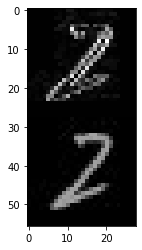

In [7]:
plt.imshow(val_x[3000].view(56,28), cmap = "gray");